<a href="https://colab.research.google.com/github/JMartinArocha/MasterBigData/blob/main/Recorrido_abanico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

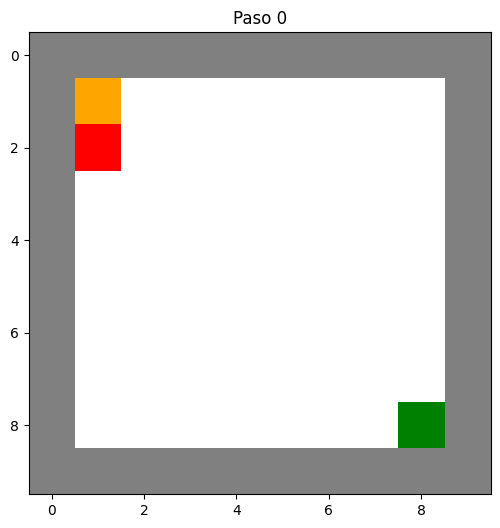

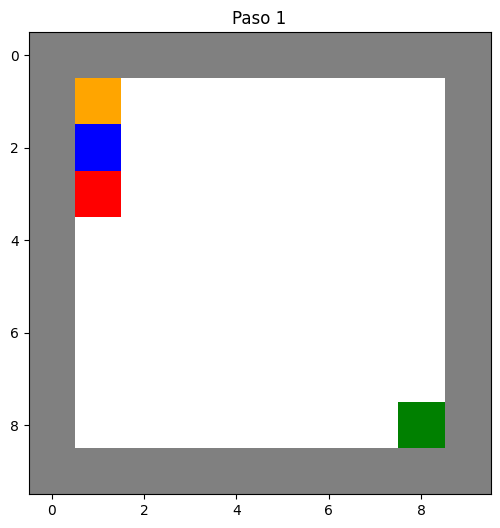

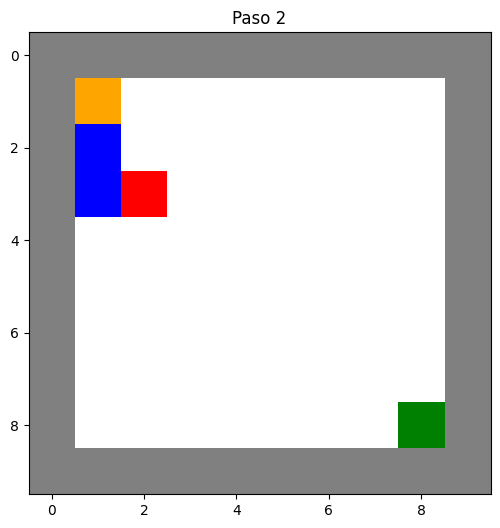

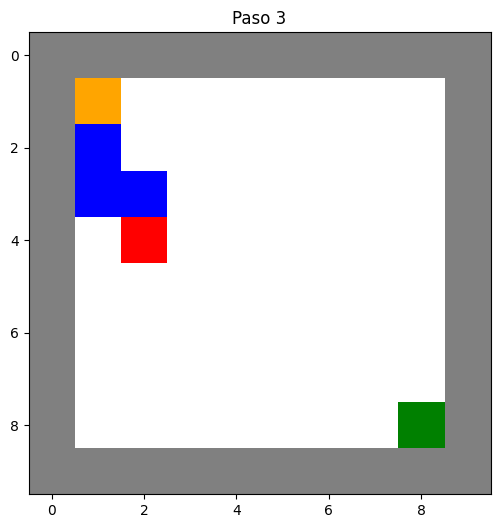

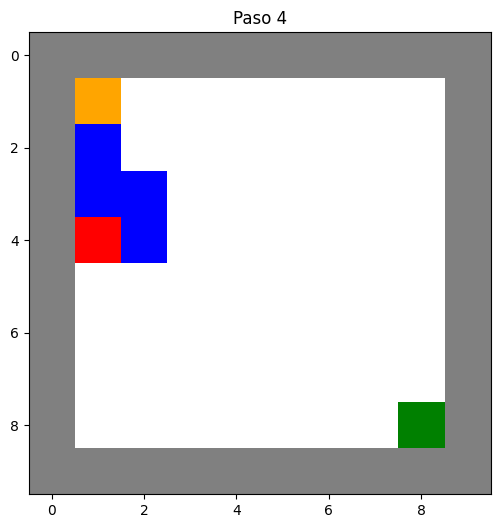

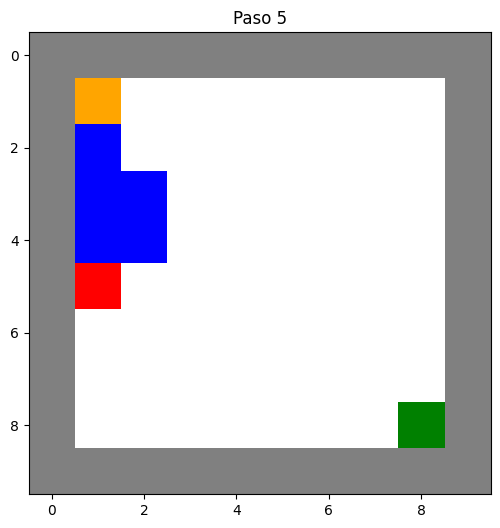

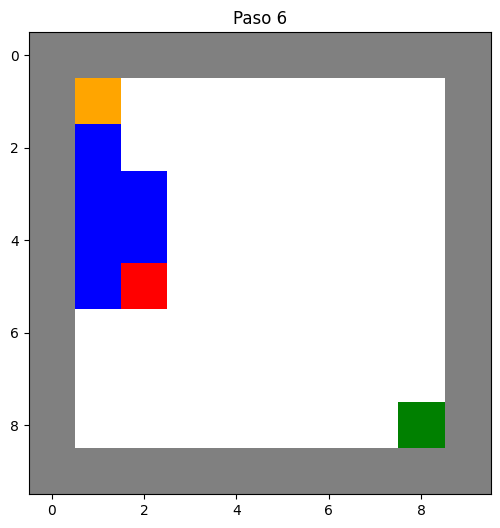

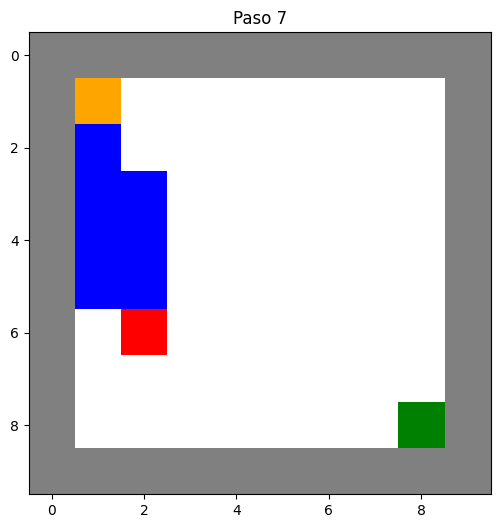

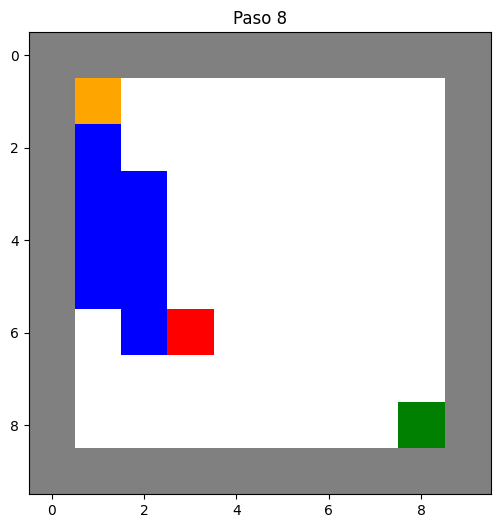

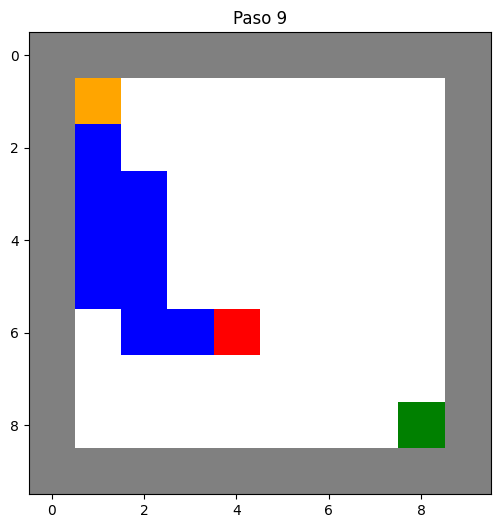

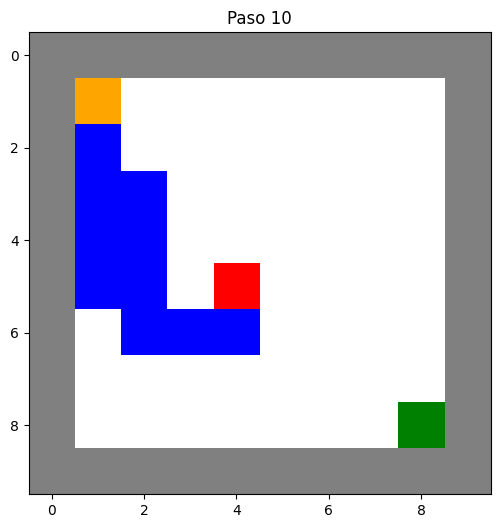

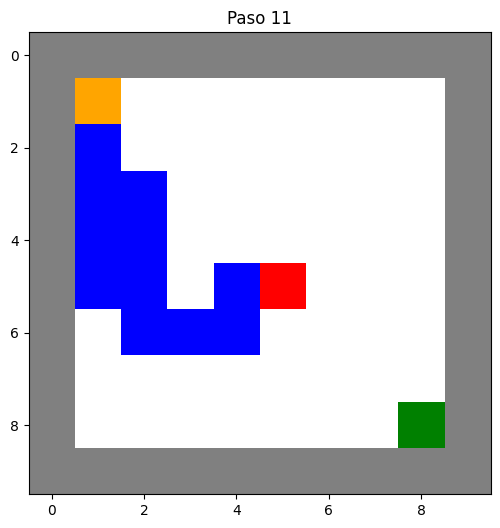

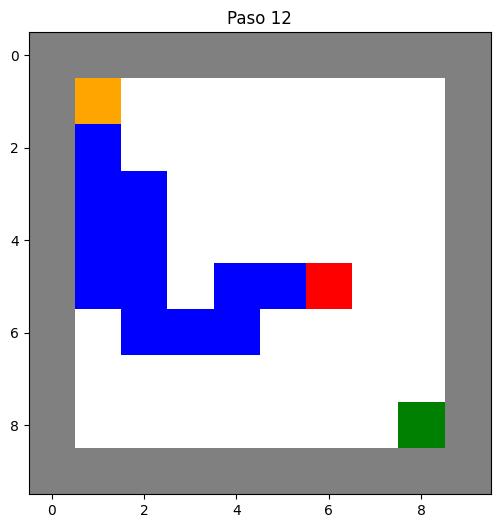

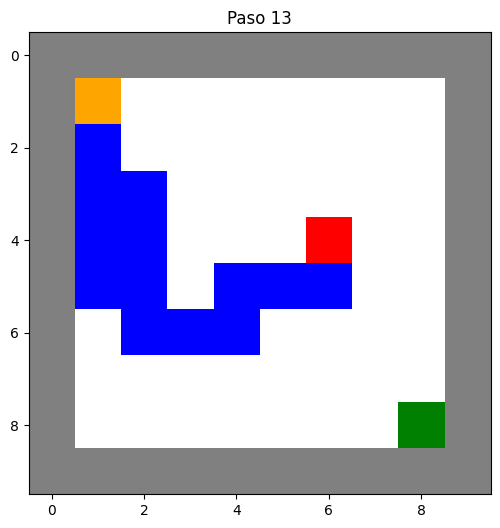

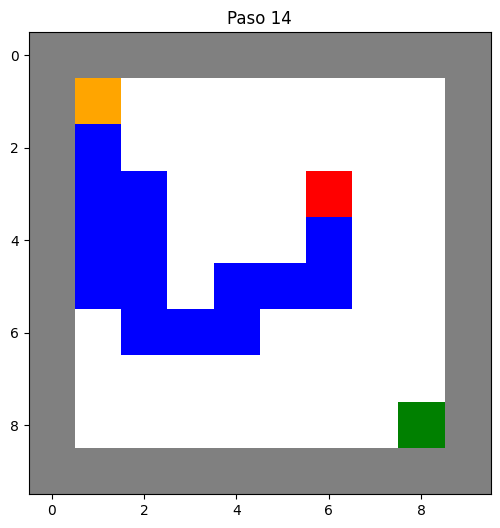

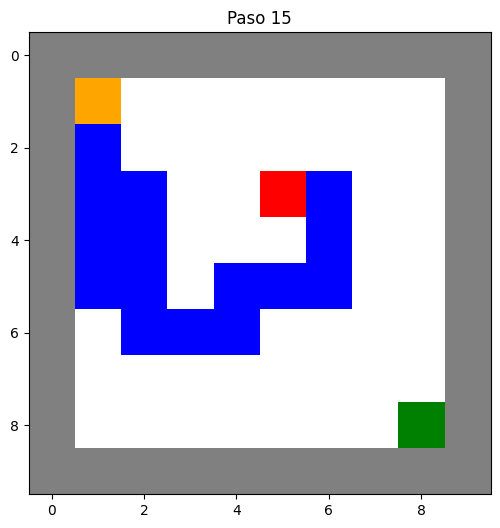

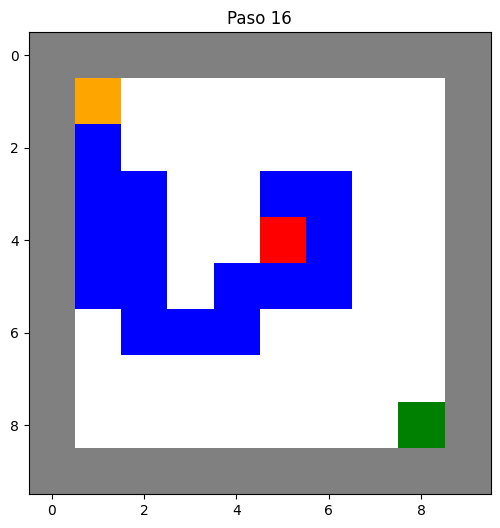

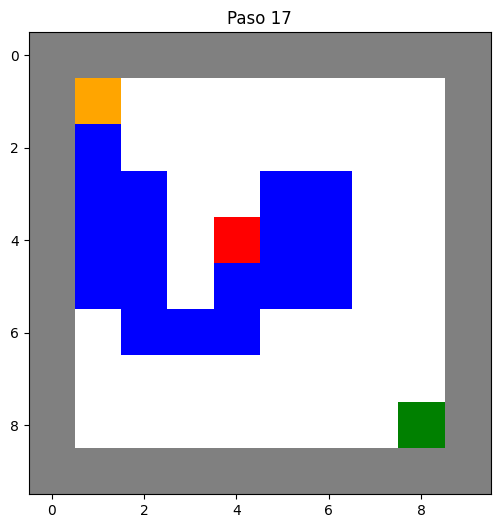

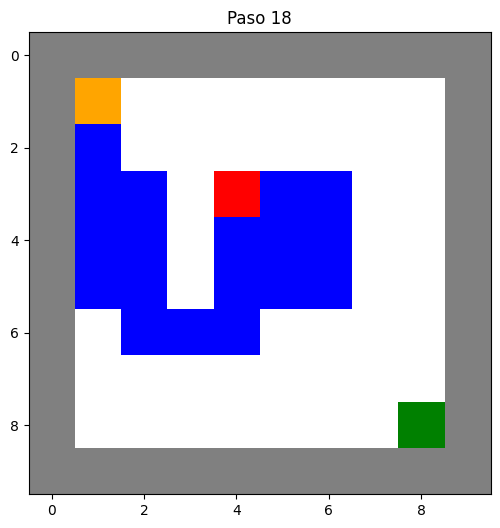

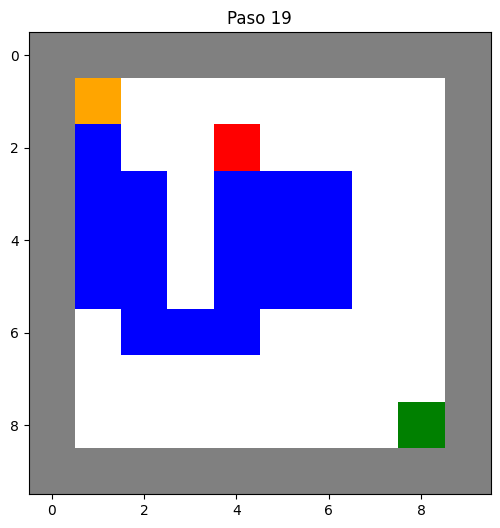

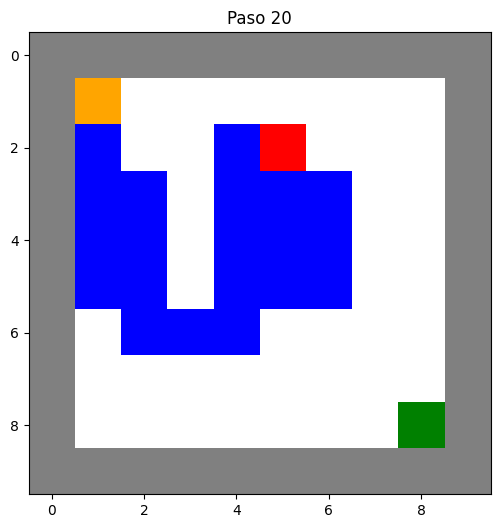

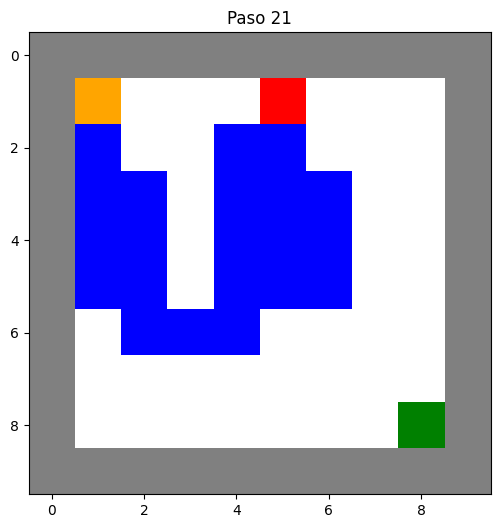

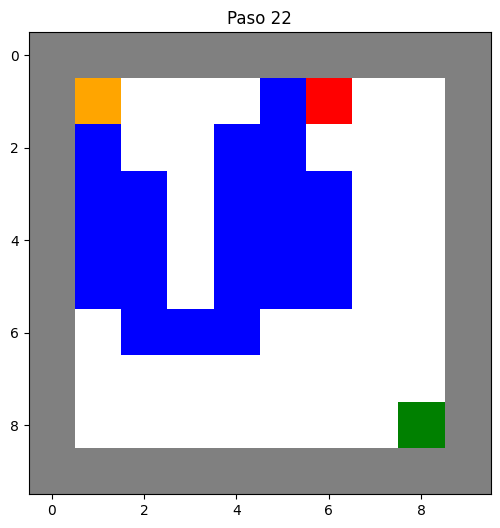

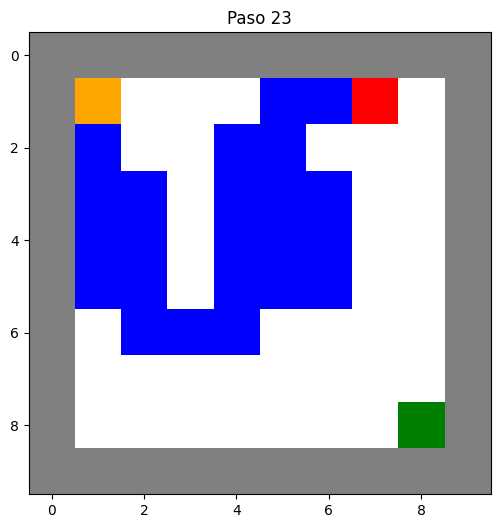

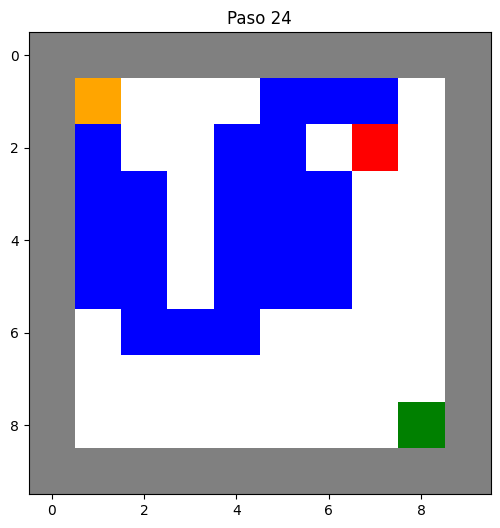

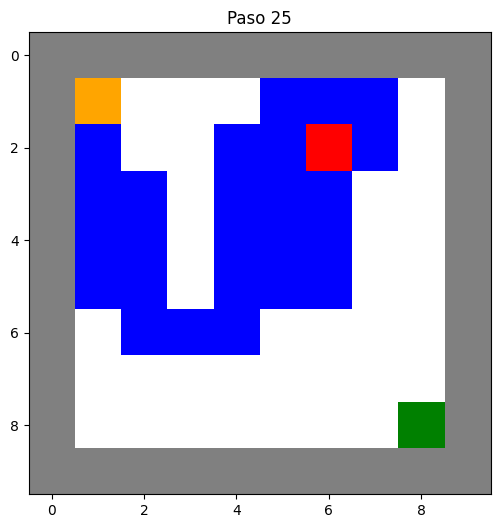

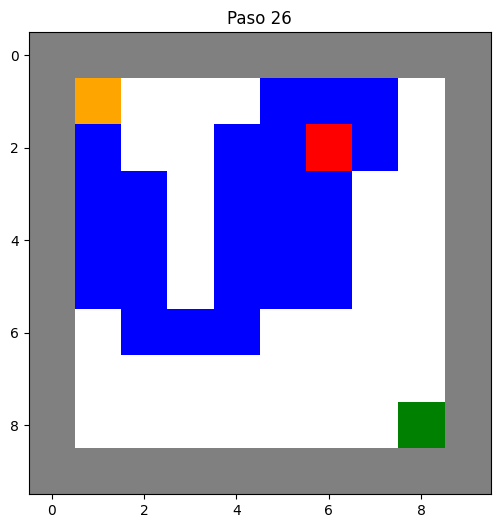

Estamos bloqueados
No se encontró un camino al objetivo.


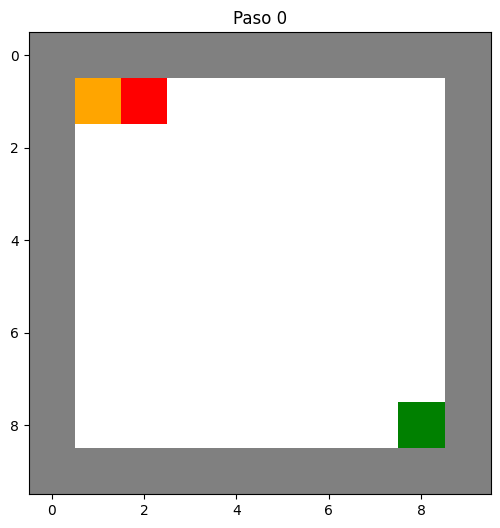

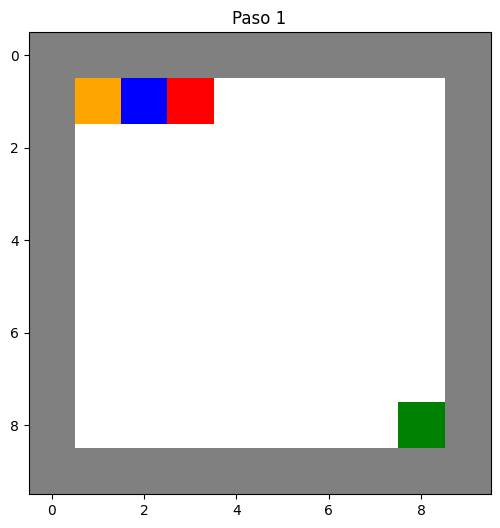

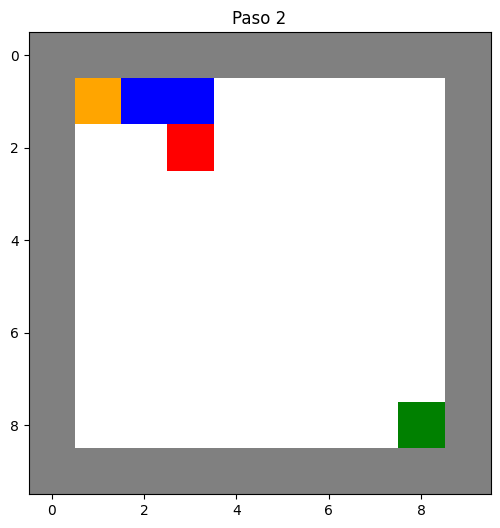

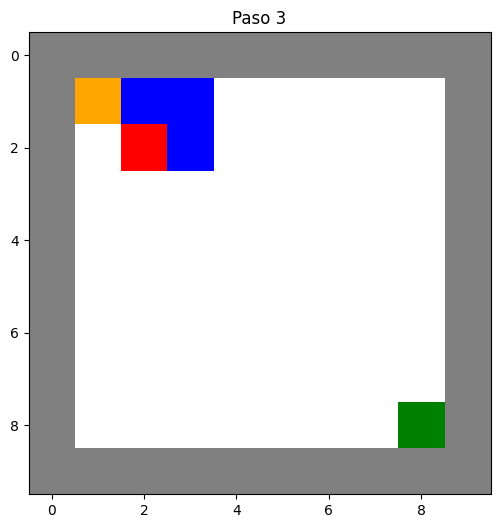

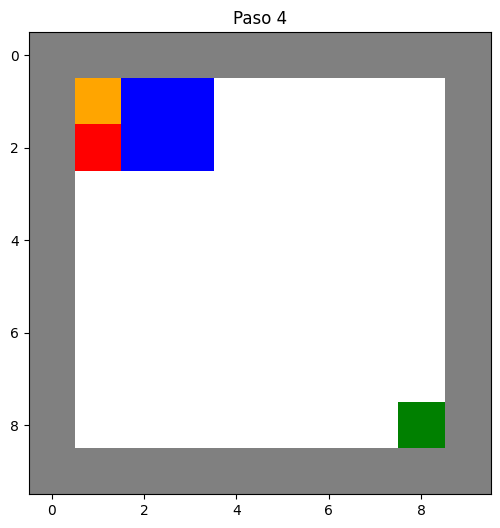

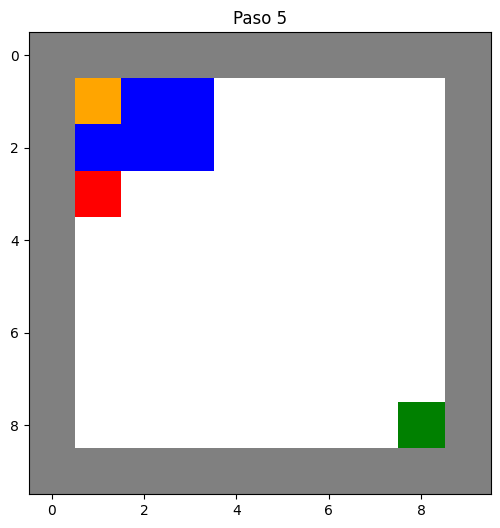

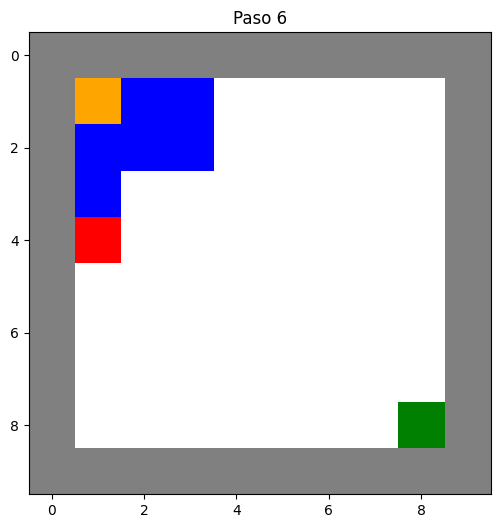

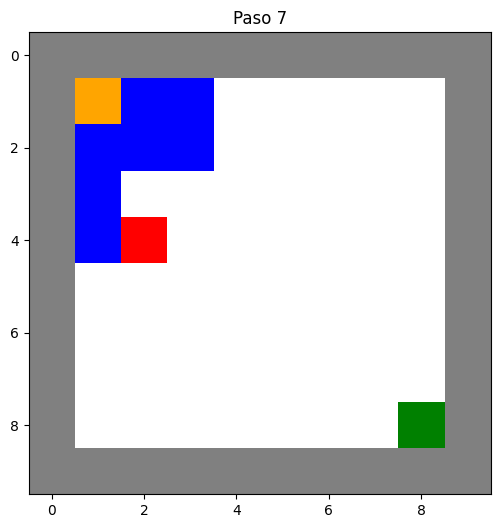

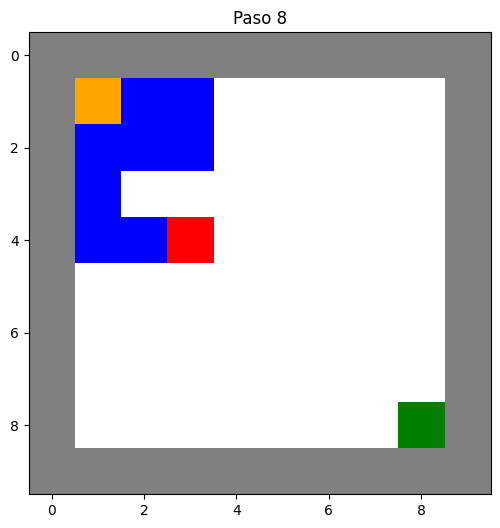

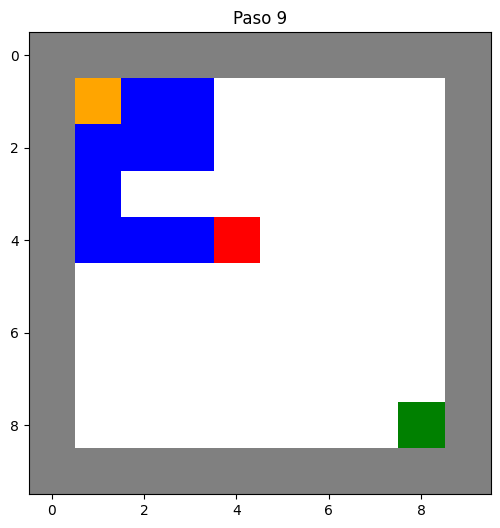

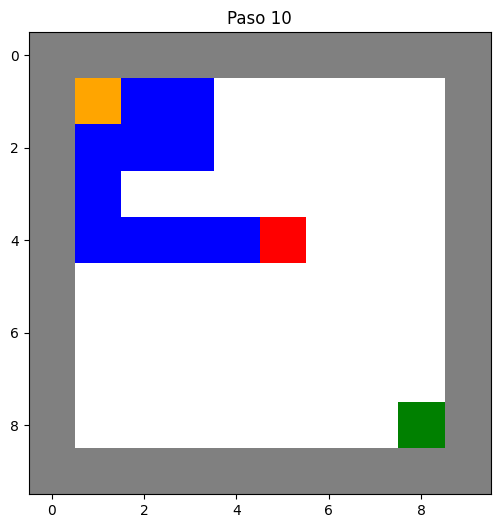

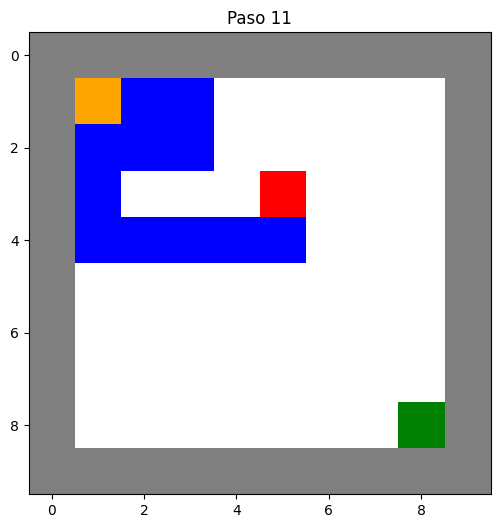

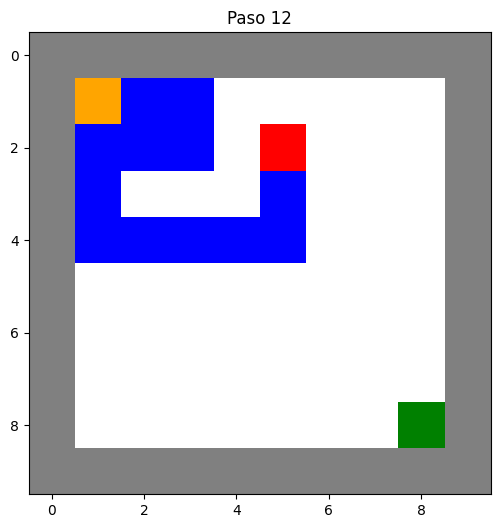

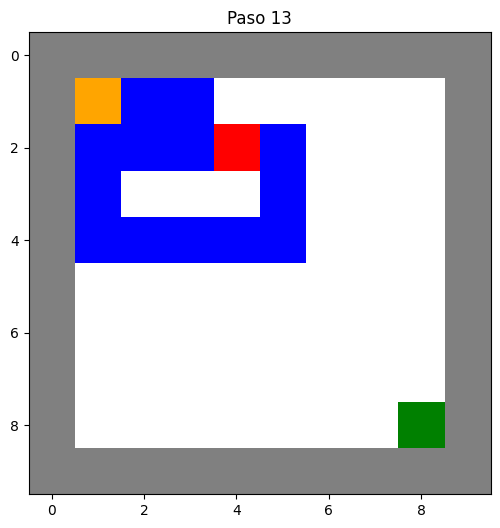

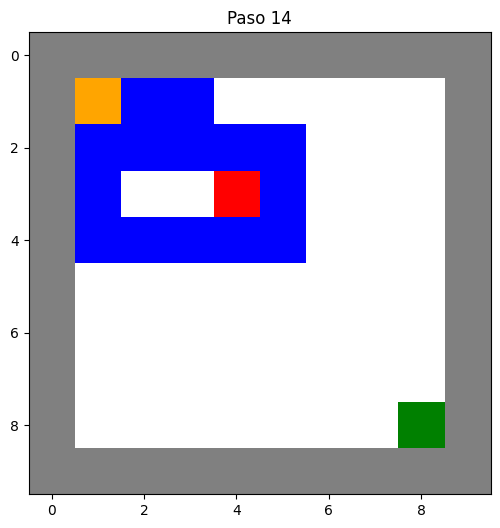

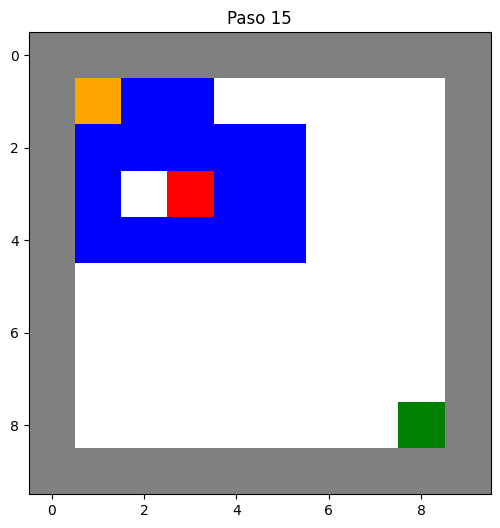

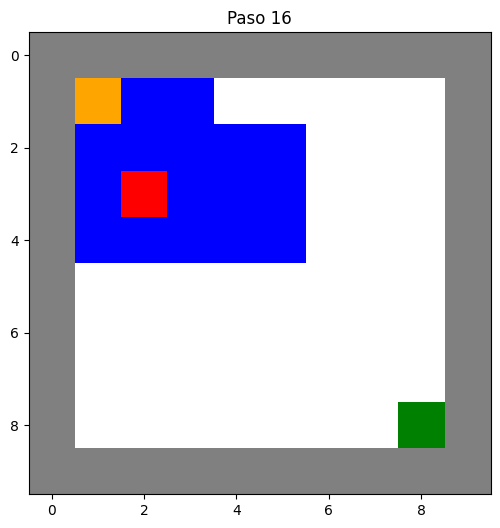

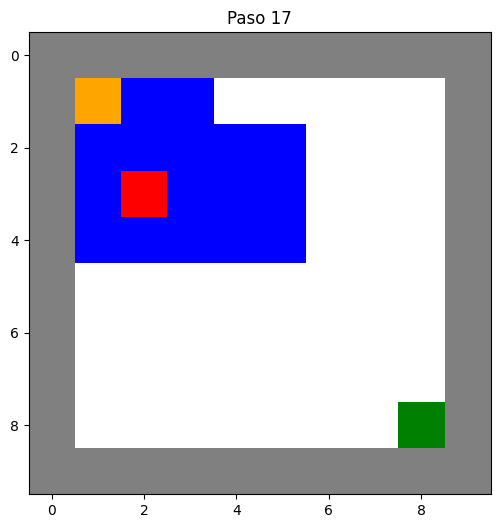

Estamos bloqueados
No se encontró un camino al objetivo.


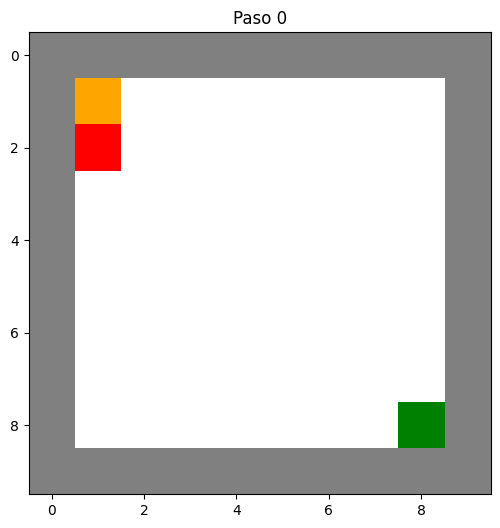

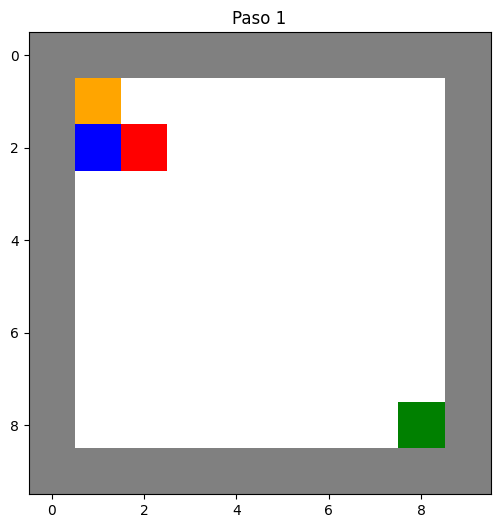

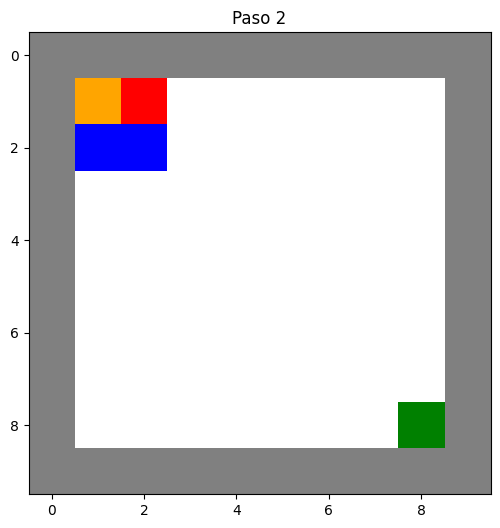

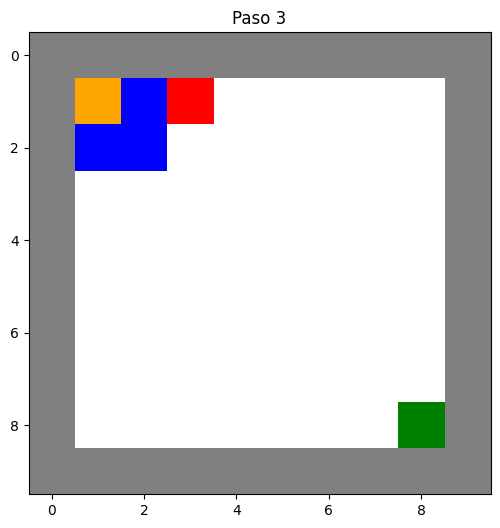

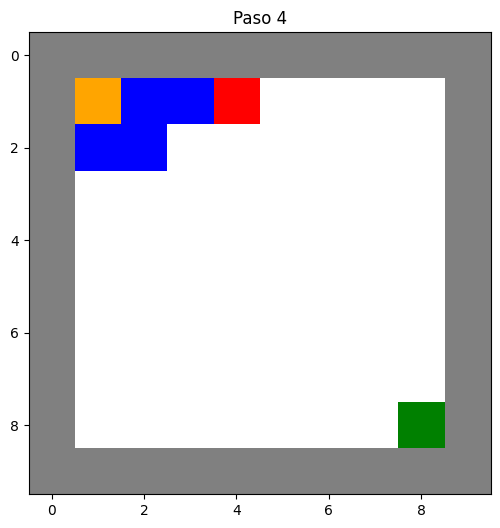

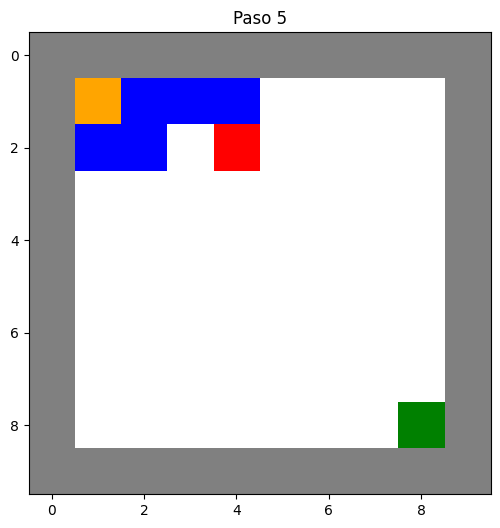

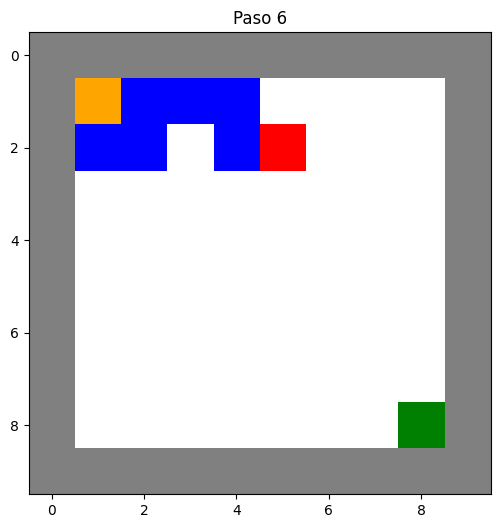

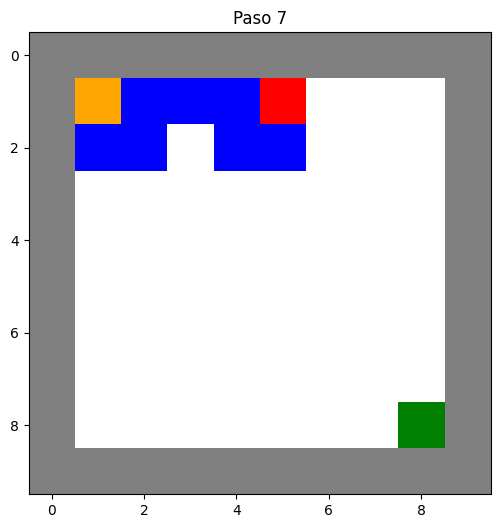

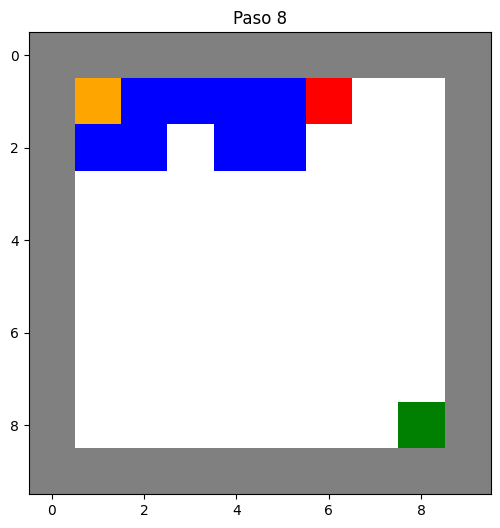

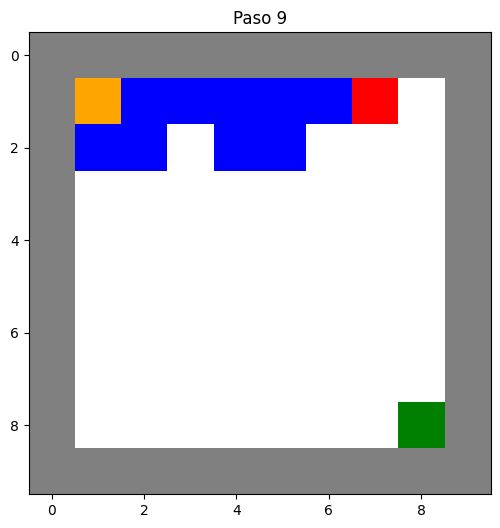

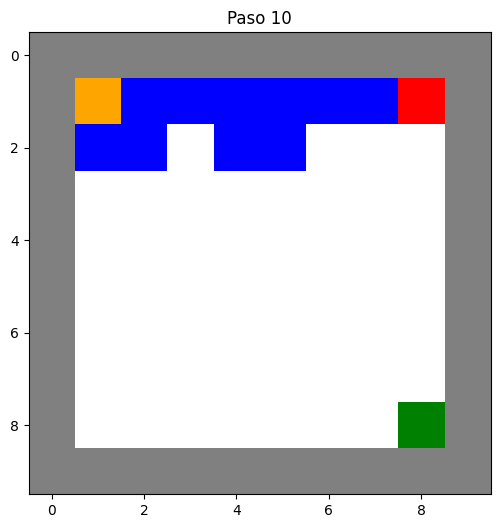

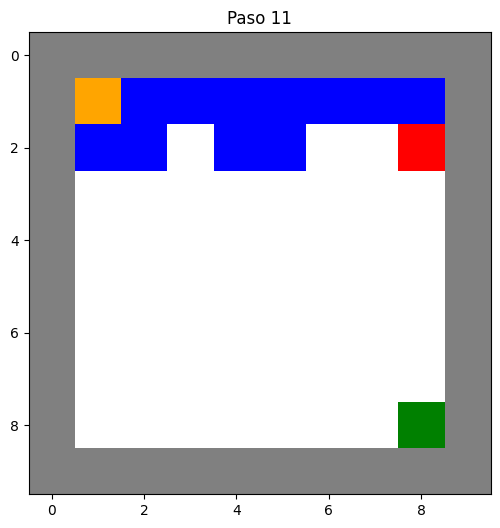

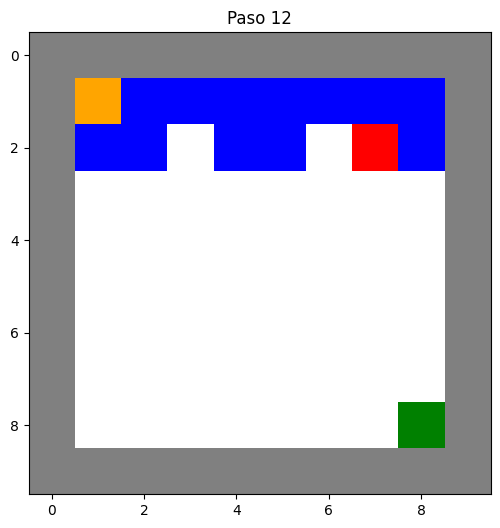

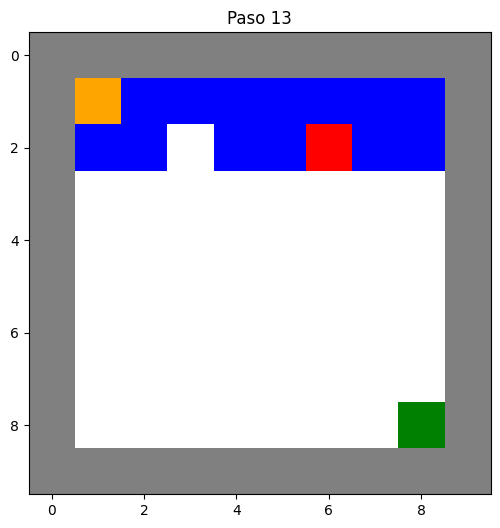

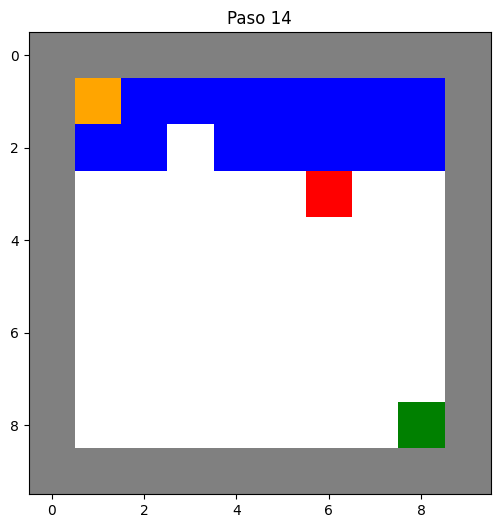

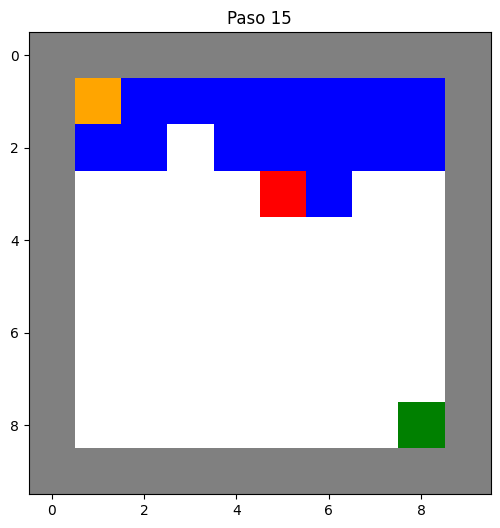

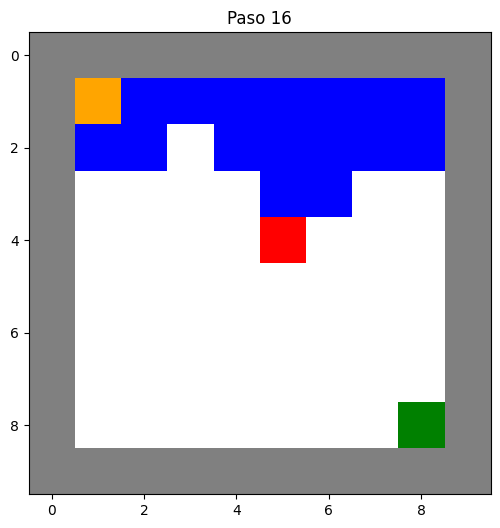

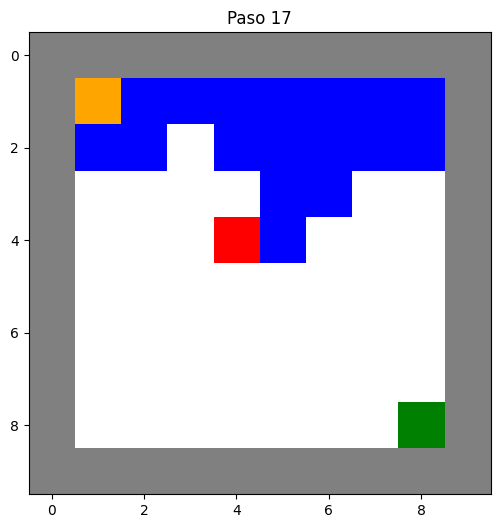

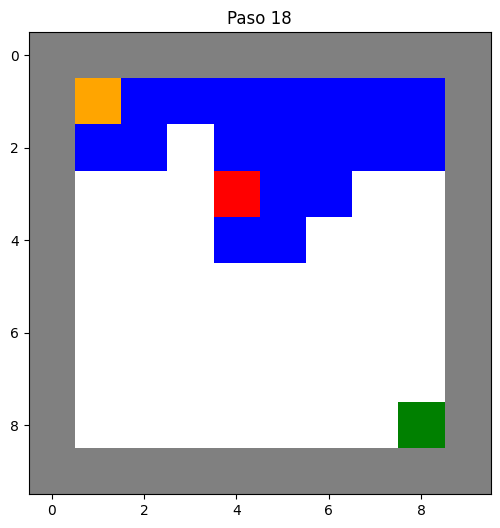

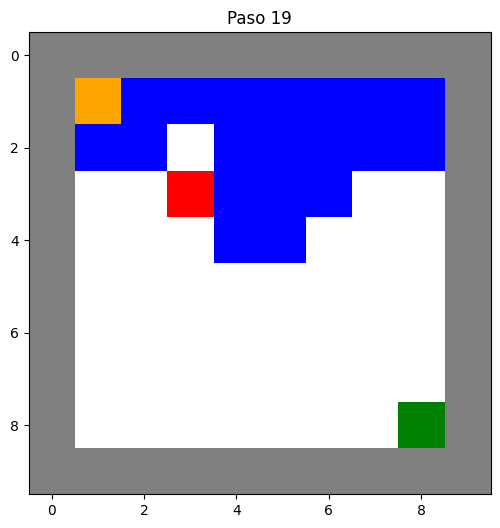

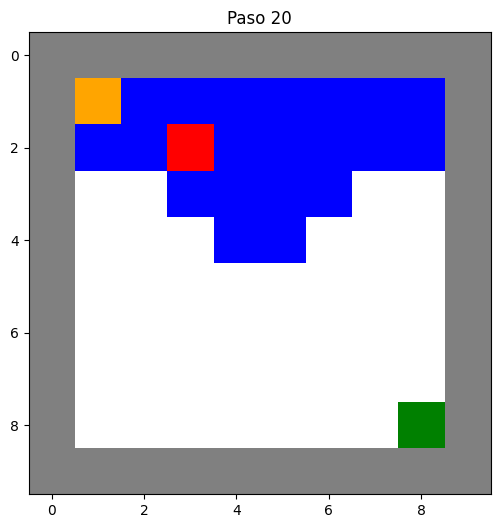

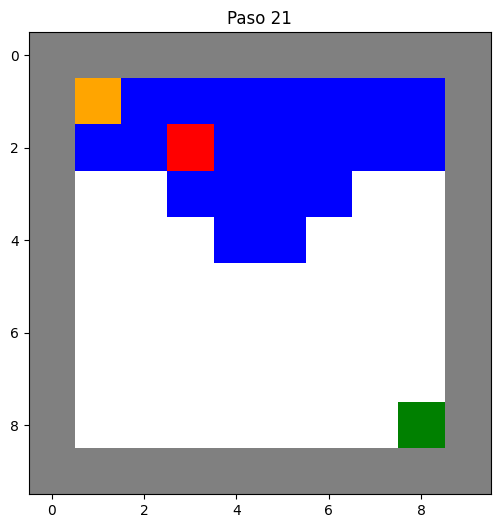

Estamos bloqueados
No se encontró un camino al objetivo.


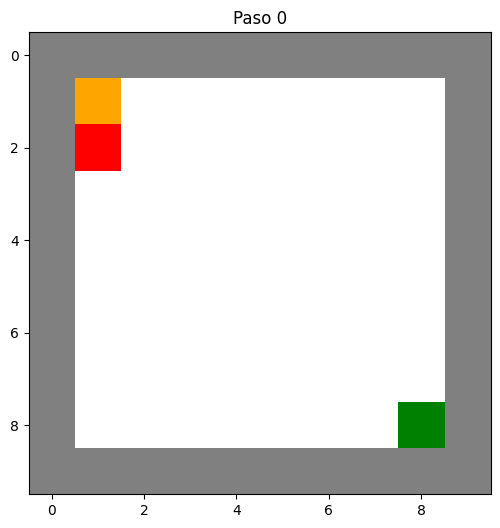

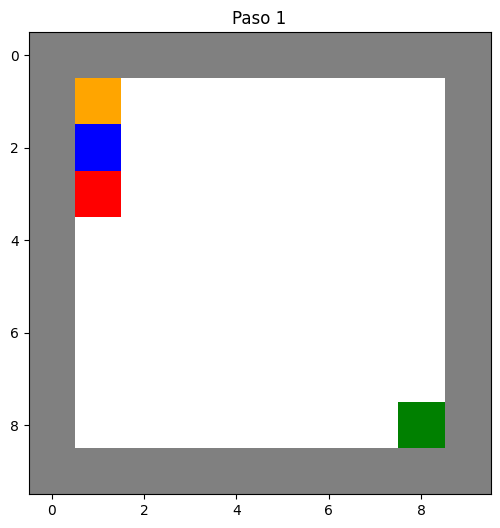

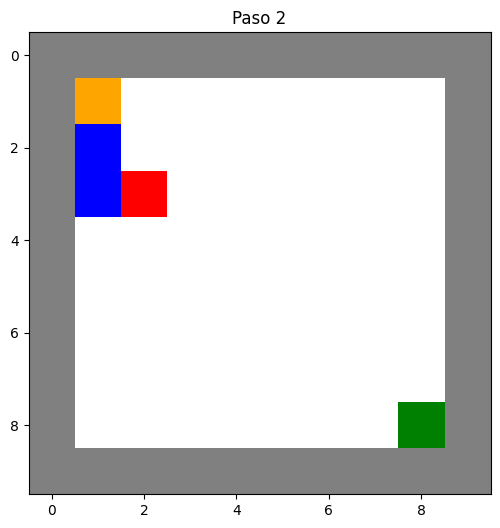

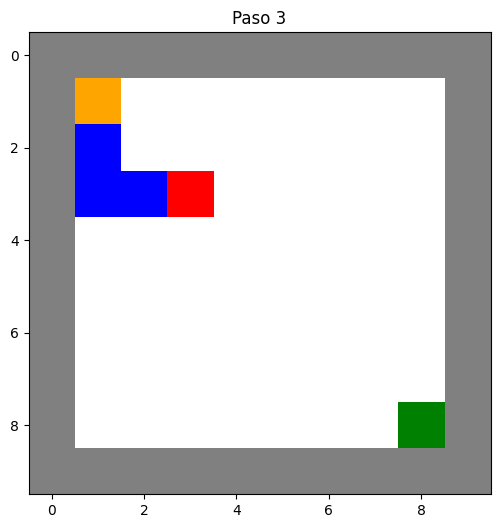

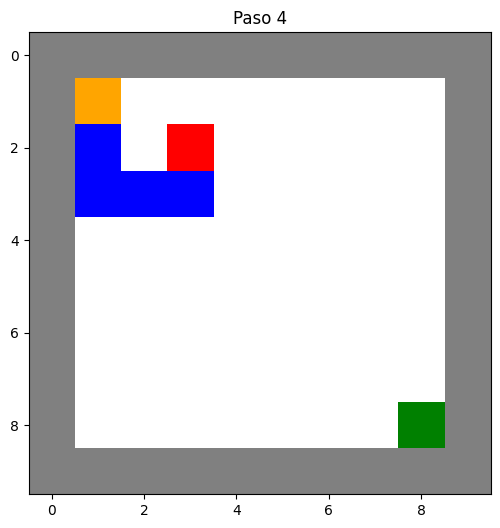

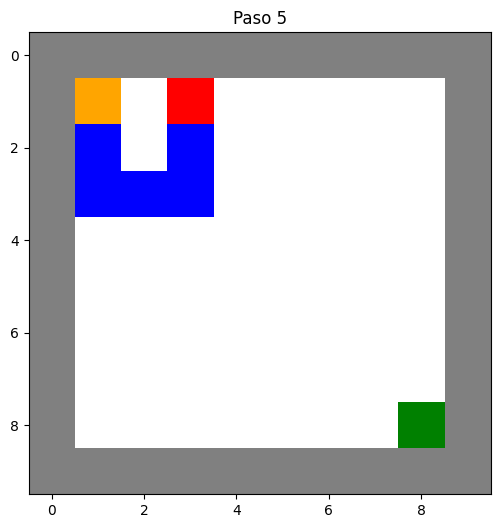

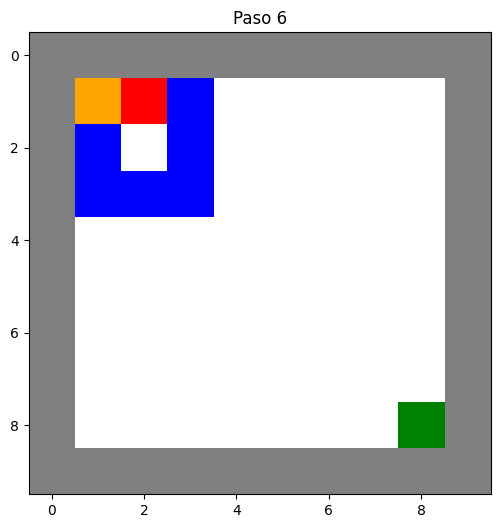

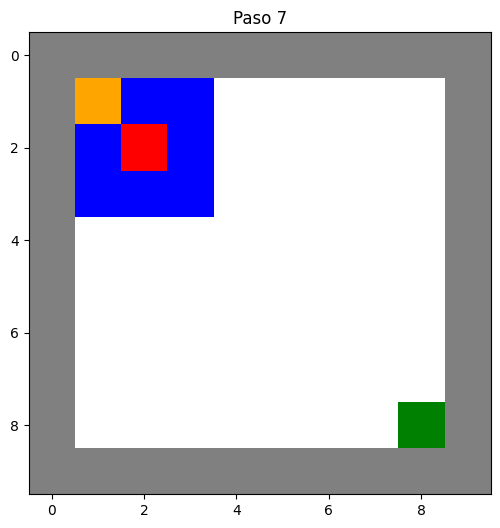

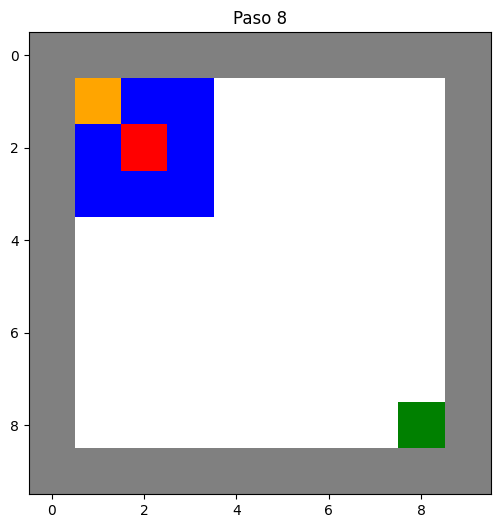

Estamos bloqueados
No se encontró un camino al objetivo.


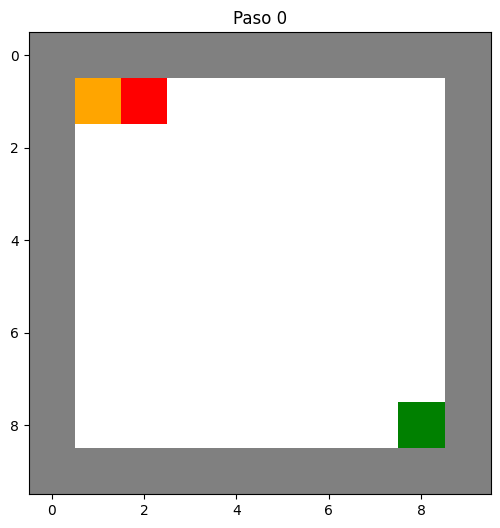

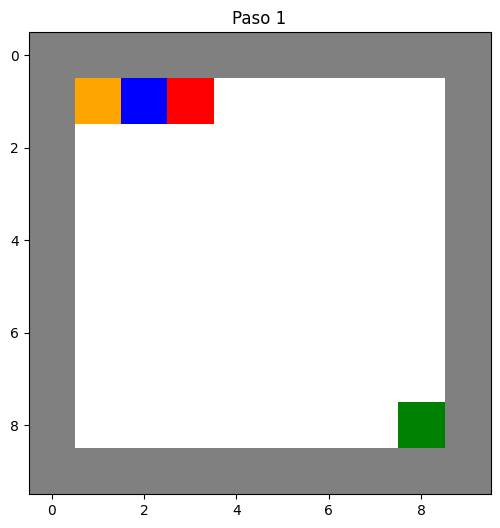

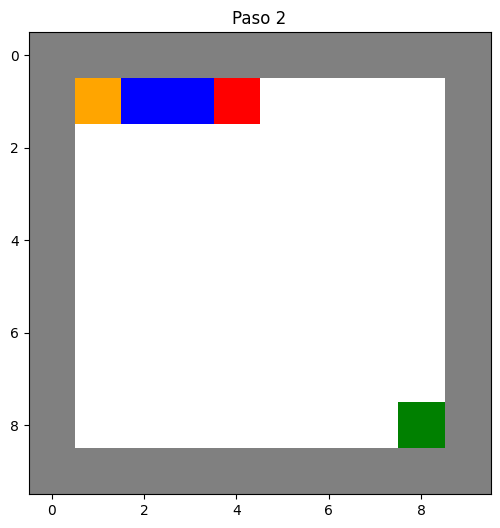

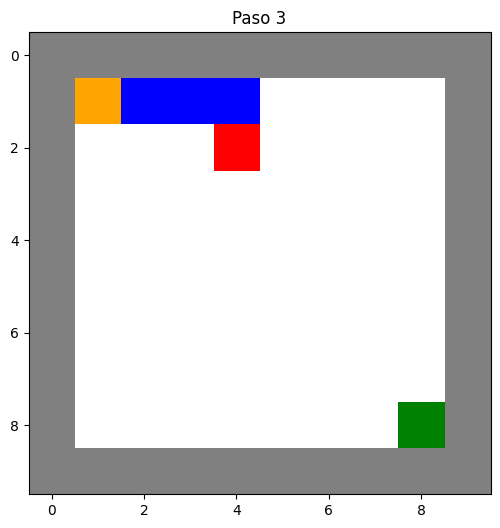

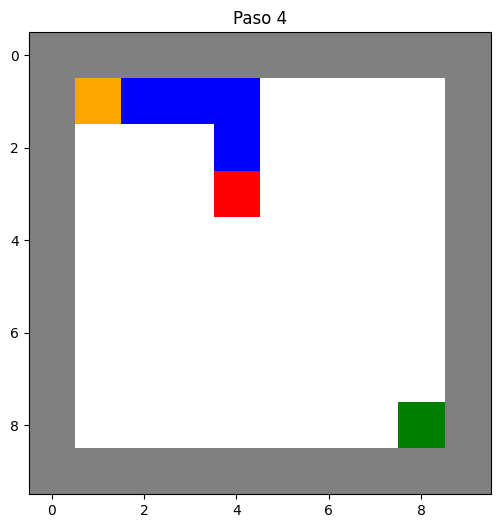

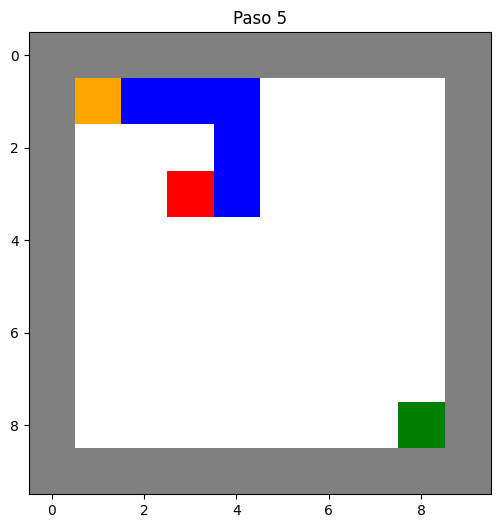

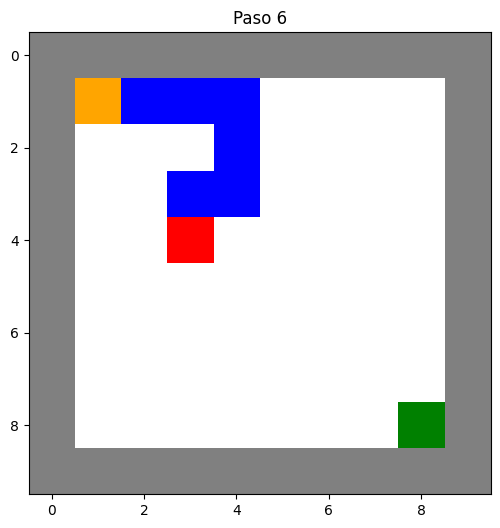

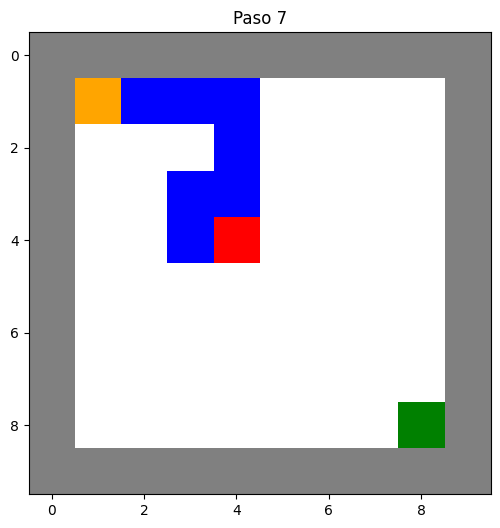

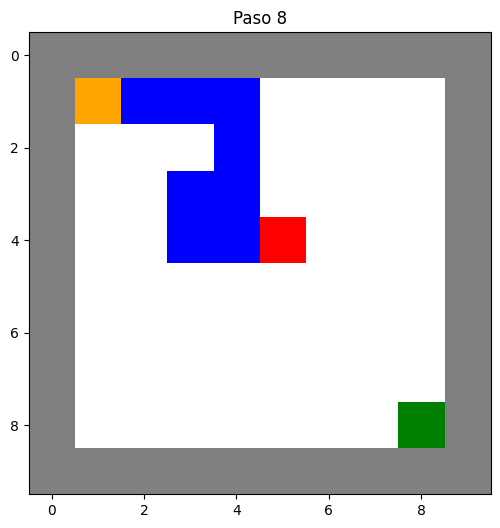

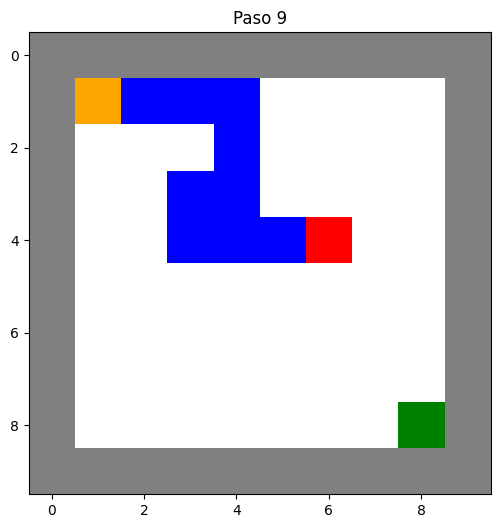

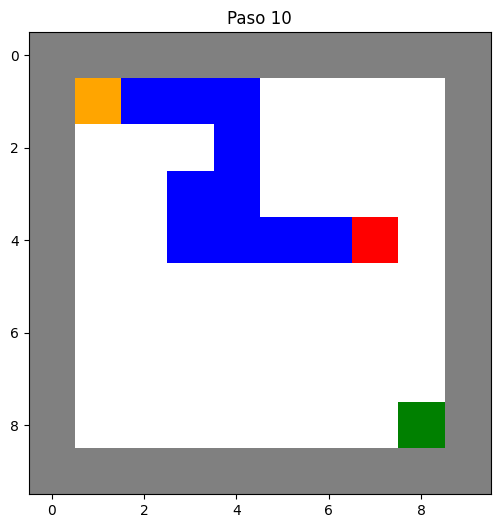

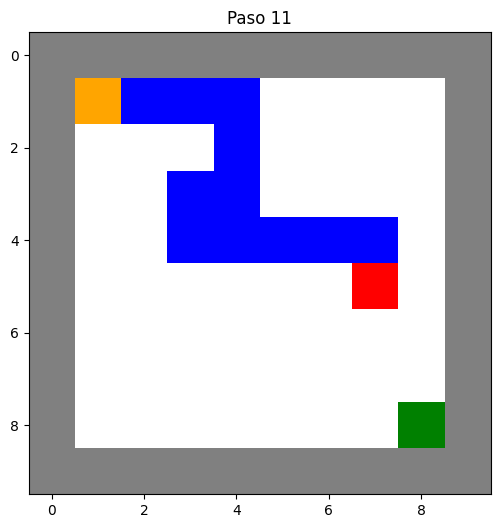

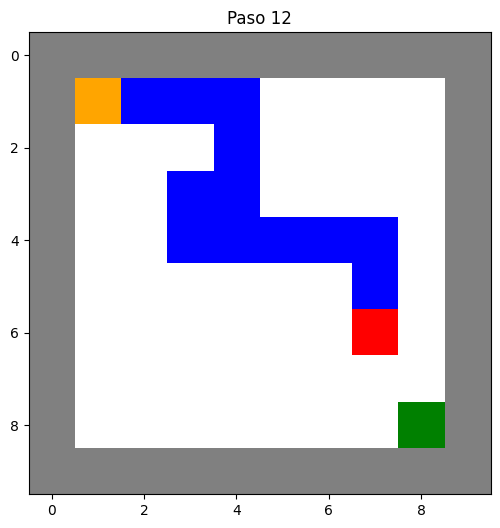

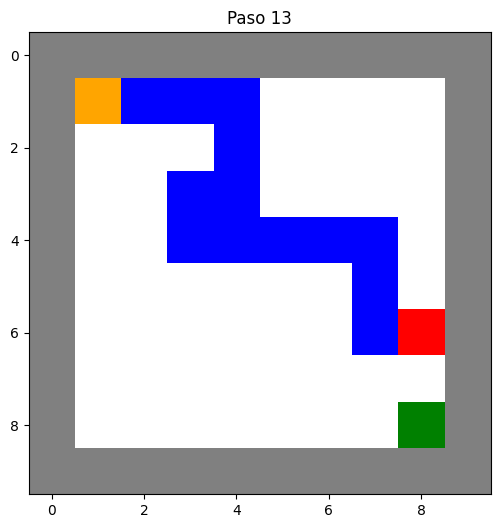

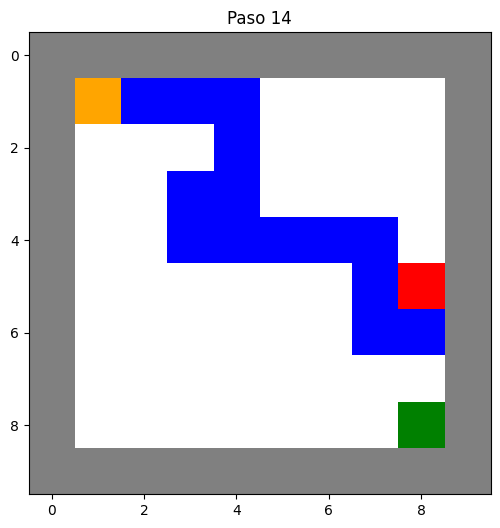

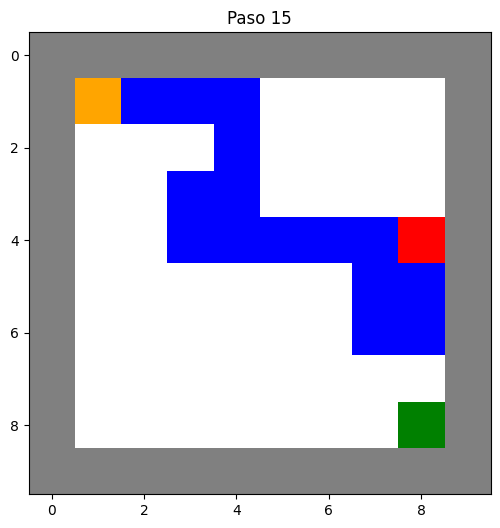

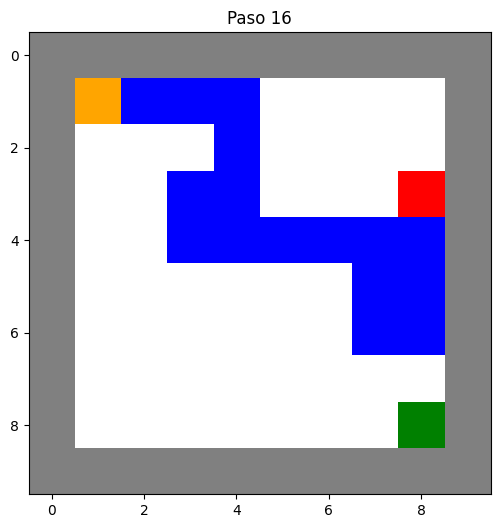

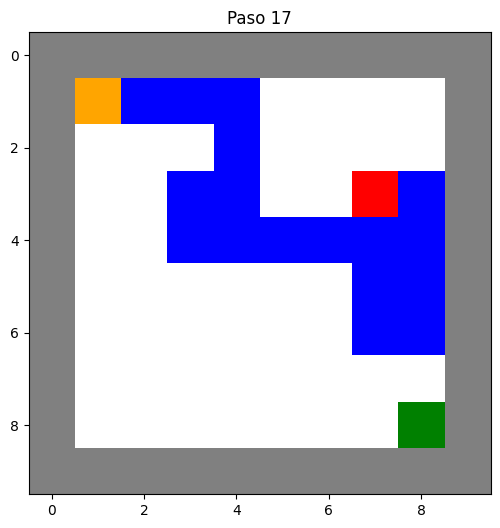

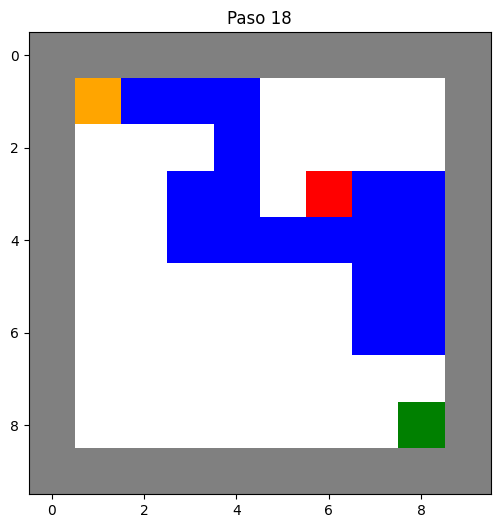

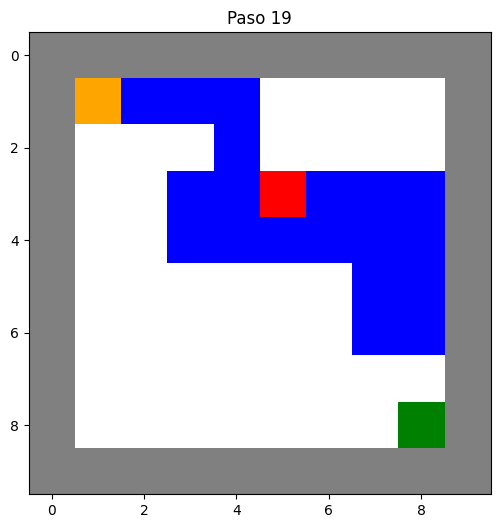

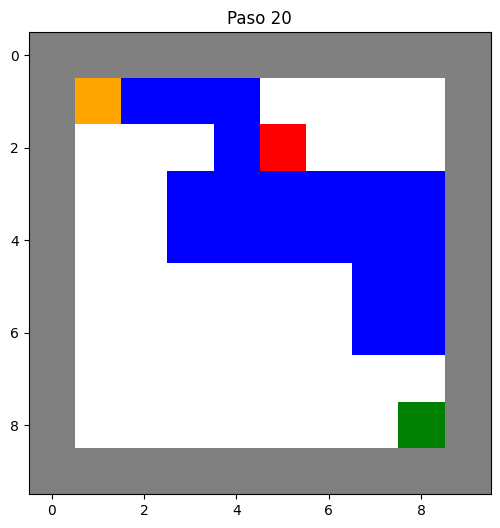

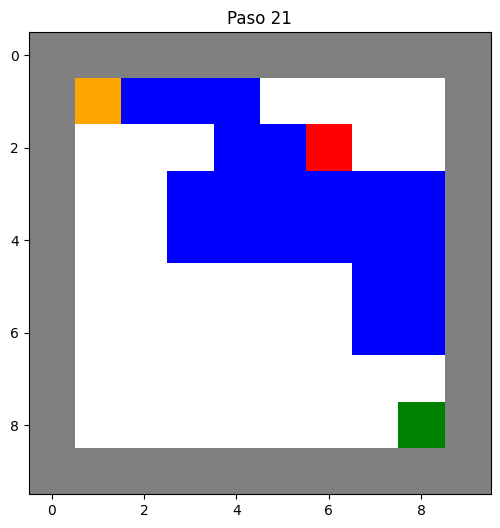

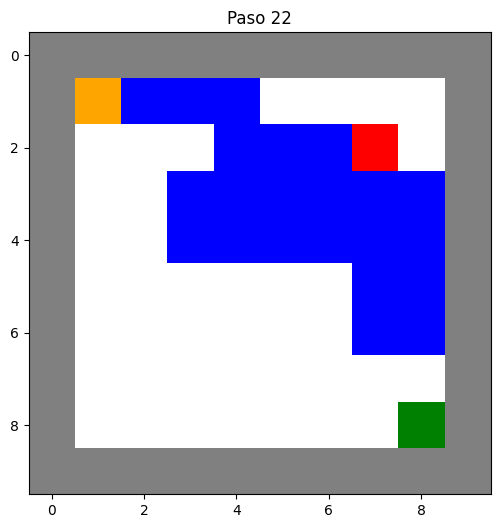

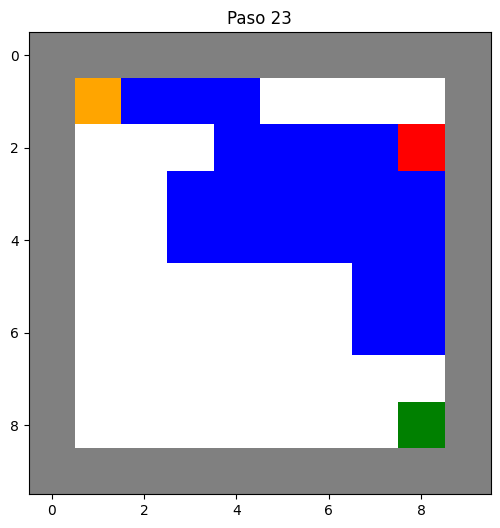

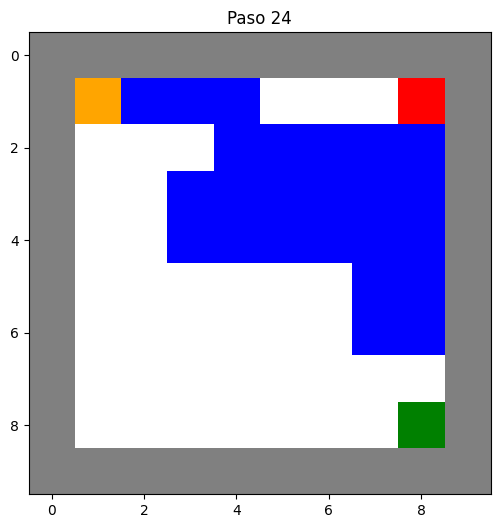

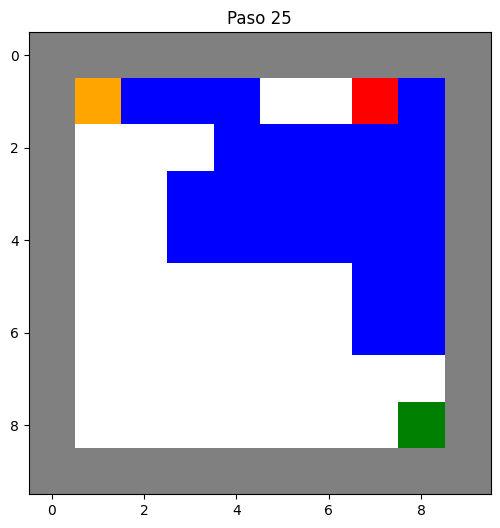

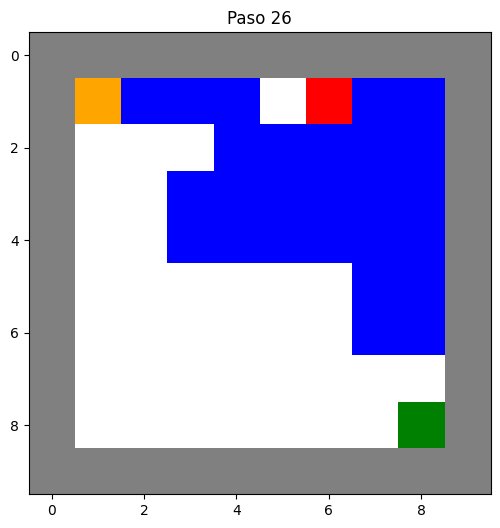

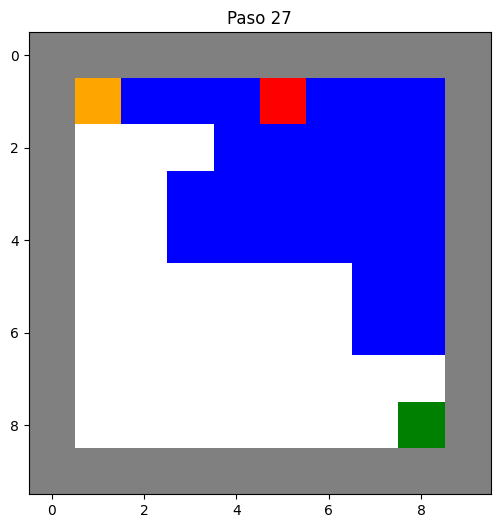

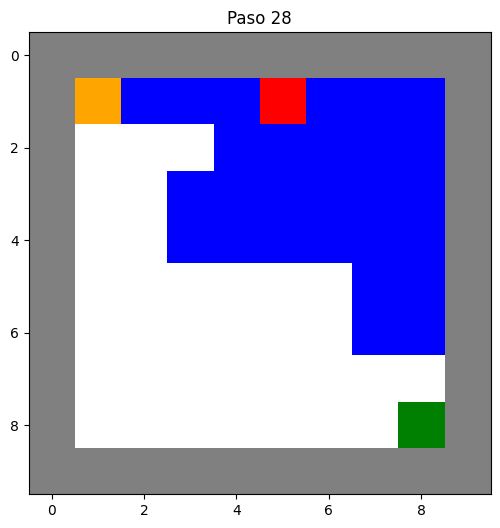

Estamos bloqueados
No se encontró un camino al objetivo.


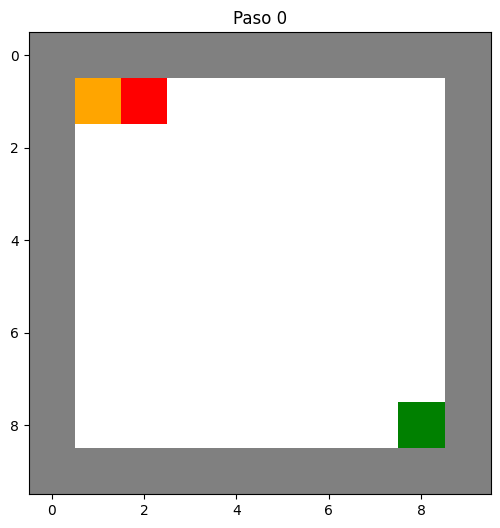

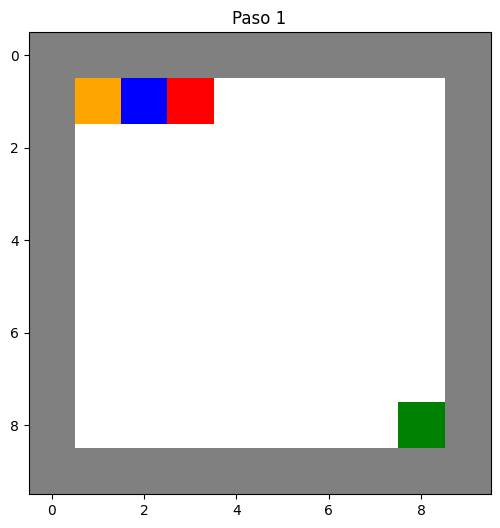

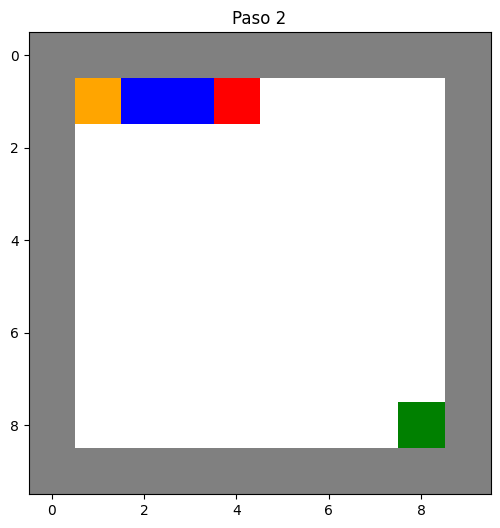

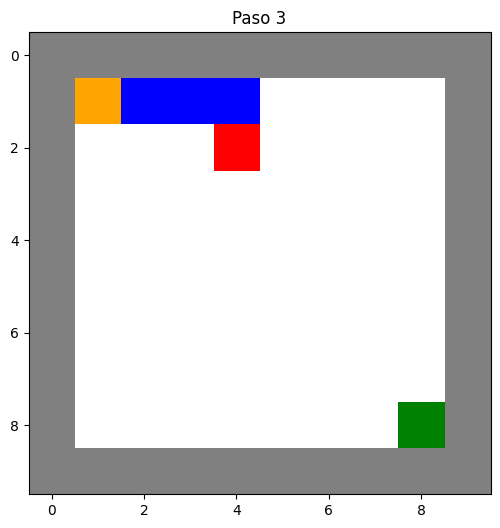

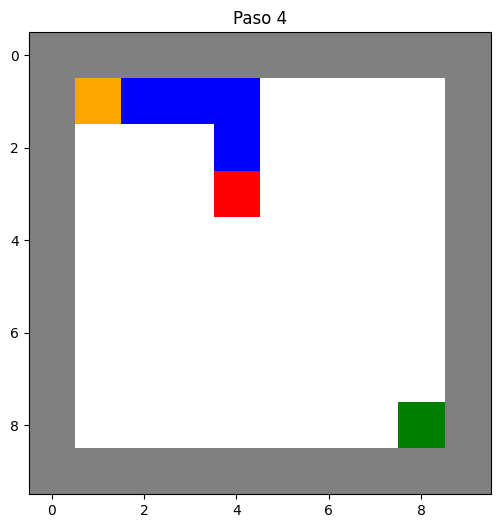

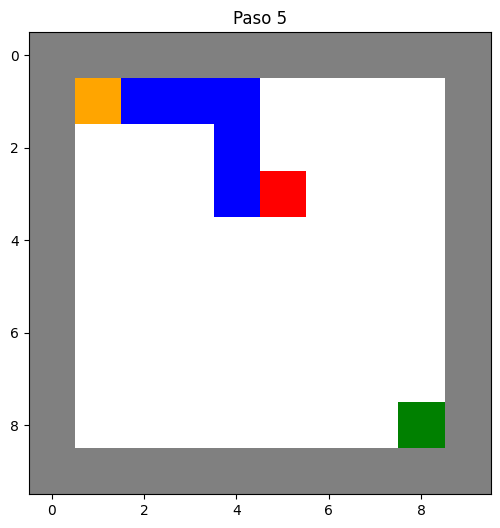

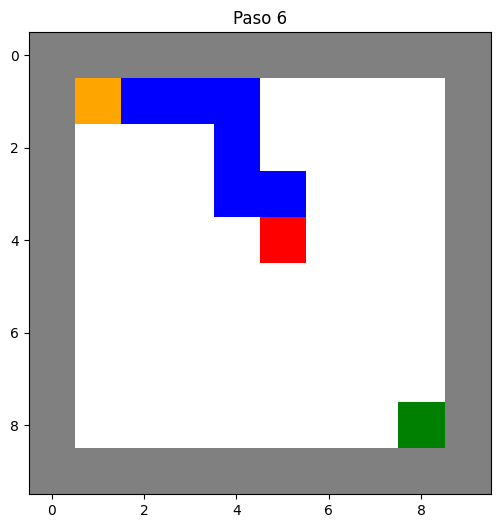

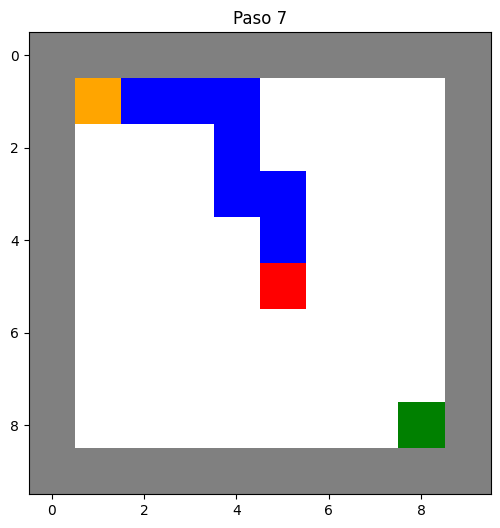

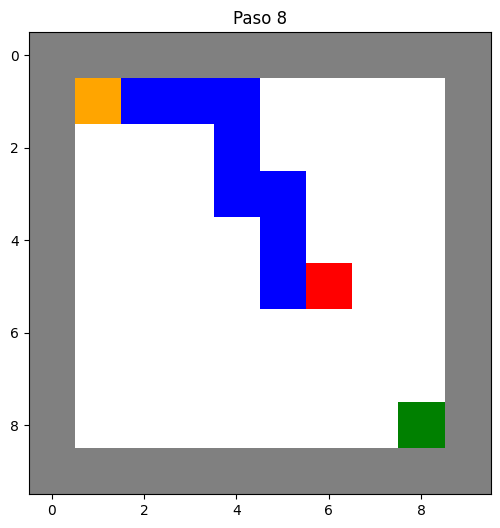

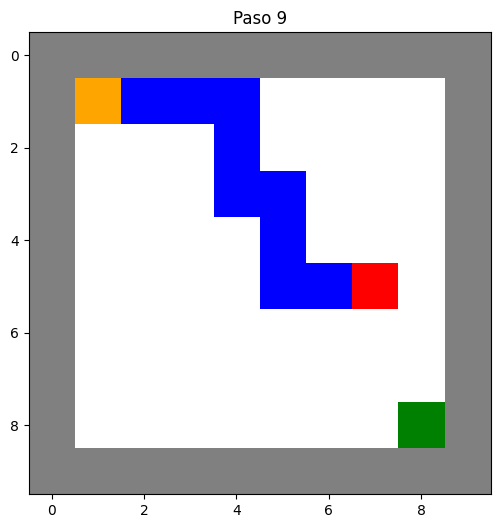

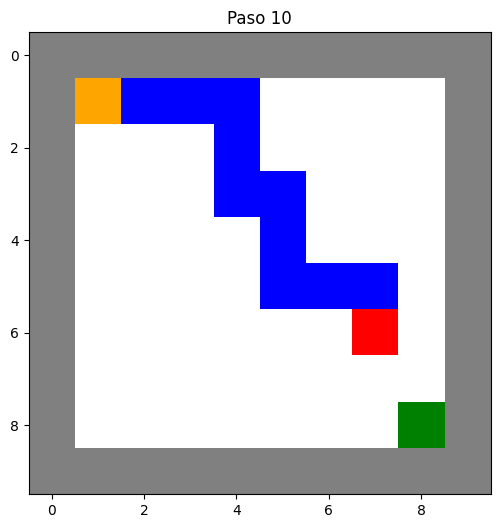

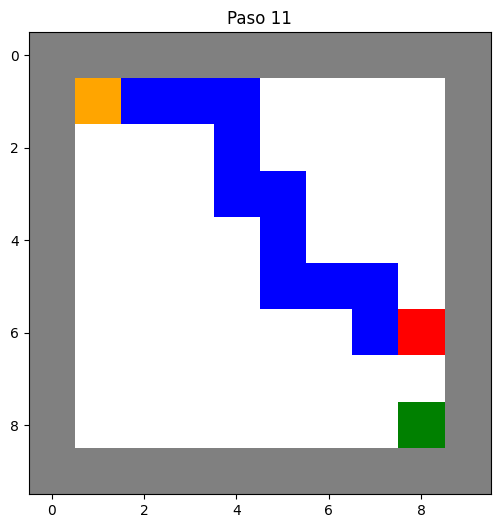

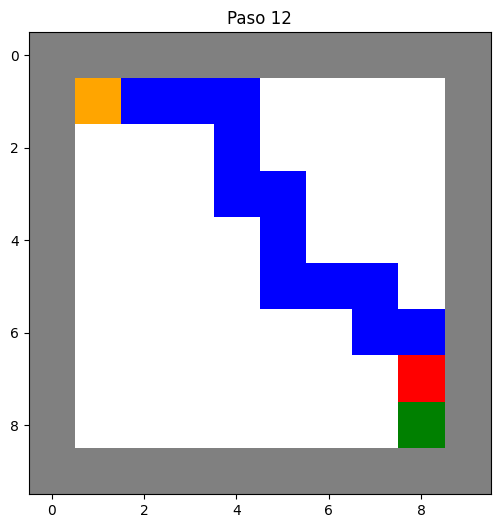

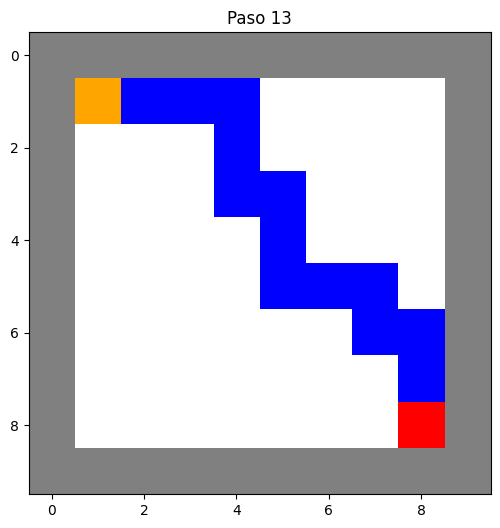

¡Llegamos al objetivo!


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import random
from collections import deque


MOVE = np.array([[0, -1], [1, 0], [0, 1], [-1, 0]])  # Arriba, Derecha, Abajo, Izquierda

class Agente:
    def __init__(self, start, goal):
        maze = np.zeros((10, 10))
        maze[0, :] = maze[-1, :] = maze[:, 0] = maze[:, -1] = 1  # Paredes exteriores
        self.maze = np.array(maze)
        self.mazeVisited = np.array(maze)
        self.start = start
        self.goal = goal
        self.visited = set([start])
        self.queue = deque([self.start])
        self.step = 0
        self.maze[self.start] = 2
        self.maze[self.goal] = 3
        self.mazeVisited[self.start] = 2
        self.mazeVisited[self.goal] = 3
        self.currentPosition = start

    # Funcion de visualización del tablero visitado
    def visualize_maze(self):
      display_maze = np.array(self.mazeVisited) # Usamos una copia para poder visualizar el agente en su posicion actual.
      display_maze[self.currentPosition] = 5  # Marcar la posición actual del agente con un color único

      cmap = matplotlib.colors.ListedColormap(['white', 'gray', 'orange', 'green', 'blue', 'red'])
      bounds = [0, 1, 2, 3, 4, 5, 6]
      norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

      plt.figure(figsize=(6, 6))
      plt.imshow(display_maze, cmap=cmap, norm=norm)
      plt.title(f"Paso {self.step}")
      plt.grid(False)
      plt.show()

    # Reinicio del trablero visitado
    def restartMaze(self):
      maze = np.zeros((10, 10))
      maze[0, :] = maze[-1, :] = maze[:, 0] = maze[:, -1] = 1  # Paredes exteriores
      self.mazeVisited = np.array(maze)
      self.mazeVisited[self.start] = 2
      self.mazeVisited[self.goal] = 3

    # Reinicio del estado
    def restart(self):
      self.currentPosition = self.start
      self.visited.clear()
      self.queue.clear()
      self.queue.append(self.start)
      self.restartMaze()
      self.step = 0

    # Función de busqueda en anchura
    def bfs(self):
        if not self.queue:
            print("No se encontró un camino al objetivo.")
            self.restart()
            return False

        x, y = self.queue.popleft()

        if (x, y) == self.goal:
          print("¡Llegamos al objetivo!")
          return True

        # Selección de los posibles movimientos
        possible_moves = []
        for dx, dy in MOVE:
          nx, ny = x + dx, y + dy
          # Comprobaciones para no movernos a un lugar incorrecto
          if 0 <= nx < len(self.mazeVisited) and 0 <= ny < len(self.mazeVisited[0]) and self.mazeVisited[nx][ny] == 0 or self.mazeVisited[nx][ny] == 3 and (nx, ny) not in self.visited:
            possible_moves.append((nx, ny))

        nextMove = random.shuffle(possible_moves)  # Aleatorizar los movimientos posibles
        for move in possible_moves:
          if move not in self.visited:
            self.queue.append(move)
            self.visited.add(move)
            self.currentPosition = move
            self.mazeVisited[move] = 4  # Marcar la posición actual visitada con un color único
            break # Solo se añade el primer movimiento válido no visitado

        self.visualize_maze()
        self.step += 1

        if len(possible_moves) == 0:
          print("Estamos bloqueados")

        return self.bfs()


    def move(self):
        return self.bfs()

# Creación y movimiento del agente
agente = Agente((1, 1), (8, 8))
goal_reached = False;
iterations = 1
while not goal_reached:
  goal_reached = agente.move()



In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
def generate_maze(width, height):
    # Inicializar el laberinto con muros
    maze = [[1 for _ in range(width)] for _ in range(height)]

    def generate_recursive(x, y):
        directions = [(0, -2), (0, 2), (-2, 0), (2, 0)]
        random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy

            if 0 < nx < width-1 and 0 < ny < height-1 and maze[nx][ny] == 1:
                maze[x + dx // 2][y + dy // 2] = 0
                maze[nx][ny] = 0
                generate_recursive(nx, ny)

    # Comenzar desde una posición aleatoria
    #start_x, start_y = random.randint(0, width // 2) * 2, random.randint(0, height // 2) * 2
    #generate_recursive(start_x, start_y)
    generate_recursive(1, 1)

    return maze

# Dimensiones del laberinto
width = 51  # Asegúrate de que sea un número impar para garantizar una solución
height = 51  # Asegúrate de que sea un número impar para garantizar una solución

# Generar el laberinto
maze = generate_maze(width,height)

# Imprimir el laberinto (solo con propósitos de visualización)
"""for row in maze:
    print(row)
"""
def visualize_example(x):
  plt.figure()
  plt.imshow(x)
  #plt.colorbar()
  plt.grid(False)
  plt.show()

visualize_example(maze)
